In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
val , vec = LA.eig( np.array([ [1,2] , [2,3] ]) )
#np.trace( np.diag( (1,-1,3 ) ) )
a = np.array( [[2,0],[0,1]])
a = a@a@a@a
a


array([[16,  0],
       [ 0,  1]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in matmul


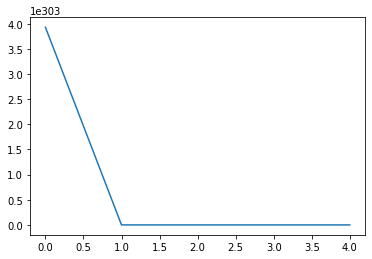

In [63]:
def transfer_mat(tau, B): #return the transfer matrix given temperature and field B
    beta = 1/tau
    J = 1
    res = np.array( [ [ np.exp(beta*J+ beta*B ), np.exp(-beta*J) ], 
                         [ np.exp(-beta*J), np.exp(beta*J - beta*B ) ] ]  )
    return res

def eig_value(matrix): # return the eig values(int array) of the matrix 
    res , a = LA.eig( matrix )
    return res

def exact_Z(N,tau,B): # Give the number of site, temperture ,and field B, return the exact partition function
    T =  transfer_mat(tau,B)
    for i in range(N):
        T = T@T
    return np.trace(T) 
def approx_Z(N,tau,B):# Give the number of site, temperture ,and field B, return the approx. partition function
    T =  transfer_mat(tau,B)
    eig , v = LA.eig(T)
    z = max( eig[0], eig[1] )
    res = z
    for i in range(N-1):
        res = res*z
    return res #return lambda_+ 

def exp(matrix, n):
    for i in range(n):
        matrix = matrix @ matrix
    return matrix


def correlation(N,tau,B , j): #It returns the expected value of the correlation between the 0th spin & the jth spin
    J = 1
    T = transfer_mat(tau ,B)
    Pauli = np.array([ [1,0] ,[0,-1] ]) #This is the Pauli matrix in z direction
    tr = np.trace ( Pauli @ exp(T,j) @ Pauli @ exp(T,N-j) ) 
    #print(approx_Z(N,tau,B))
    return tr/approx_Z(N,tau,B)

def draw_correl(N, tau,B):
    y = []
    x = []
    for i in range(int(N/2)):
        x+=[i]
        y += [correlation(N,tau,B,i)]
    plt.plot(x,y)
    return #y,x

tau = 100
b = 1 

draw_correl(10,tau,b)
